## ANN Simple in Tensorflow 2.0


#### Steps for building your first ANN

- Data Preprocessing
- Add input layer
- Random w init
- Add Hidden Layers
- Select Optimizer, Loss, and Performance Metrics
- Compile the model
- use model.fit to train the model
- Evaluate the model
- Adjust optimization parameters or model if needed
- Plot The History Keyss
- Save and Load for Inference

In [ ]:
# pip install tensorflow==2.0.0-rc0
# pip install tensorflow-gpu==2.0.0-rc0

In [ ]:
import tensorflow as tf
from tensorflow import keras
from tensorflow.keras import Sequential
from tensorflow.keras.layers import Flatten, Dense

In [ ]:
print(tf.__version__)

2.11.0


In [ ]:
import numpy as np
import pandas as pd
from sklearn.model_selection import train_test_split

In [ ]:
from google.colab import drive
drive.mount('/content/drive/')
import os
os.chdir('/content/drive/MyDrive/E2Edata')  # Fix This if your file is in a Certain Directory in Your Drive

Mounted at /content/drive/


In [ ]:
dataset = pd.read_csv('Customer_Churn_Modelling.csv')

In [ ]:
dataset.head()

,RowNumber,CustomerId,Surname,CreditScore,Geography,Gender,Age,Tenure,Balance,NumOfProducts,HasCrCard,IsActiveMember,EstimatedSalary,Exited
0,1,15634602,Hargrave,619,France,Female,42,2,0.00,1,1,1,101348.88,1
1,2,15647311,Hill,608,Spain,Female,41,1,83807.86,1,0,1,112542.58,0
2,3,15619304,Onio,502,France,Female,42,8,159660.80,3,1,0,113931.57,1
3,4,15701354,Boni,699,France,Female,39,1,0.00,2,0,0,93826.63,0
4,5,15737888,Mitchell,850,Spain,Female,43,2,125510.82,1,1,1,79084.10,0


In [ ]:
X = dataset.drop(labels=['CustomerId', 'Surname', 'RowNumber', 'Exited'], axis = 1)
y = dataset['Exited']

In [ ]:
y

0       1
1       0
2       1
3       0
4       0
       ..
9995    0
9996    0
9997    1
9998    1
9999    0
Name: Exited, Length: 10000, dtype: int64

In [ ]:
X.head()

,CreditScore,Geography,Gender,Age,Tenure,Balance,NumOfProducts,HasCrCard,IsActiveMember,EstimatedSalary
0,619,France,Female,42,2,0.00,1,1,1,101348.88
1,608,Spain,Female,41,1,83807.86,1,0,1,112542.58
2,502,France,Female,42,8,159660.80,3,1,0,113931.57
3,699,France,Female,39,1,0.00,2,0,0,93826.63
4,850,Spain,Female,43,2,125510.82,1,1,1,79084.10


In [ ]:
y.head()

0    1
1    0
2    1
3    0
4    0
Name: Exited, dtype: int64

In [ ]:
from sklearn.preprocessing import LabelEncoder

In [ ]:
label1 = LabelEncoder()
X['Geography'] = label1.fit_transform(X['Geography'])

In [ ]:
X.head()

,CreditScore,Geography,Gender,Age,Tenure,Balance,NumOfProducts,HasCrCard,IsActiveMember,EstimatedSalary
0,619,0,Female,42,2,0.00,1,1,1,101348.88
1,608,2,Female,41,1,83807.86,1,0,1,112542.58
2,502,0,Female,42,8,159660.80,3,1,0,113931.57
3,699,0,Female,39,1,0.00,2,0,0,93826.63
4,850,2,Female,43,2,125510.82,1,1,1,79084.10


In [ ]:
label = LabelEncoder()
X['Gender'] = label.fit_transform(X['Gender'])
X.head()

,CreditScore,Geography,Gender,Age,Tenure,Balance,NumOfProducts,HasCrCard,IsActiveMember,EstimatedSalary
0,619,0,0,42,2,0.00,1,1,1,101348.88
1,608,2,0,41,1,83807.86,1,0,1,112542.58
2,502,0,0,42,8,159660.80,3,1,0,113931.57
3,699,0,0,39,1,0.00,2,0,0,93826.63
4,850,2,0,43,2,125510.82,1,1,1,79084.10


In [ ]:
X = pd.get_dummies(X, drop_first=True, columns=['Geography'])
X.head()

,CreditScore,Gender,Age,Tenure,Balance,NumOfProducts,HasCrCard,IsActiveMember,EstimatedSalary,Geography_1,Geography_2
0,619,0,42,2,0.00,1,1,1,101348.88,0,0
1,608,0,41,1,83807.86,1,0,1,112542.58,0,1
2,502,0,42,8,159660.80,3,1,0,113931.57,0,0
3,699,0,39,1,0.00,2,0,0,93826.63,0,0
4,850,0,43,2,125510.82,1,1,1,79084.10,0,1


### Feature Standardization

In [ ]:
from sklearn.preprocessing import StandardScaler

In [ ]:
X_train, X_test, y_train, y_test = train_test_split(X, y, test_size = 0.2, random_state = 65)

In [ ]:
scaler = StandardScaler()
X_train = scaler.fit_transform(X_train)
X_test = scaler.transform(X_test)

In [ ]:
np.mean(X_train)

4.7477173707606696e-17

### Build ANN

In [ ]:
model = Sequential()
model.add(Dense(64, activation='relu', input_dim = X.shape[1]))
model.add(Dense(128, activation='relu'))
model.add(Dense(256, activation='relu'))
model.add(Dense(1, activation = 'sigmoid'))

In [ ]:
X.shape[1]

11

In [ ]:
model.summary()

Model: "sequential_1"
_________________________________________________________________
 Layer (type)                Output Shape              Param #   
 dense_3 (Dense)             (None, 64)                768       
                                                                 
 dense_4 (Dense)             (None, 128)               8320      
                                                                 
 dense_5 (Dense)             (None, 256)               33024     
                                                                 
 dense_6 (Dense)             (None, 1)                 257       
                                                                 
Total params: 42,369
Trainable params: 42,369
Non-trainable params: 0
_________________________________________________________________


In [ ]:
model.compile(optimizer='adam', loss = 'binary_crossentropy', metrics=['accuracy'])

In [ ]:
history= model.fit(X_train, y_train,validation_data=(X_test, y_test), batch_size = 32, epochs = 10, verbose = 1)

Epoch 1/10
250/250 [==============================] - 3s 5ms/step - loss: 0.4151 - accuracy: 0.8289 - val_loss: 0.3640 - val_accuracy: 0.8575
Epoch 2/10
250/250 [==============================] - 2s 6ms/step - loss: 0.3539 - accuracy: 0.8559 - val_loss: 0.3604 - val_accuracy: 0.8500
Epoch 3/10
250/250 [==============================] - 2s 6ms/step - loss: 0.3414 - accuracy: 0.8581 - val_loss: 0.3391 - val_accuracy: 0.8600
Epoch 4/10
250/250 [==============================] - 1s 4ms/step - loss: 0.3340 - accuracy: 0.8630 - val_loss: 0.3426 - val_accuracy: 0.8565
Epoch 5/10
250/250 [==============================] - 1s 3ms/step - loss: 0.3261 - accuracy: 0.8652 - val_loss: 0.3440 - val_accuracy: 0.8600
Epoch 6/10
250/250 [==============================] - 1s 3ms/step - loss: 0.3224 - accuracy: 0.8659 - val_loss: 0.3386 - val_accuracy: 0.8565
Epoch 7/10
250/250 [==============================] - 1s 4ms/step - loss: 0.3180 - accuracy: 0.8684 - val_loss: 0.3537 - val_accuracy: 0.8560
Epoch 

dict_keys(['loss', 'accuracy', 'val_loss', 'val_accuracy'])


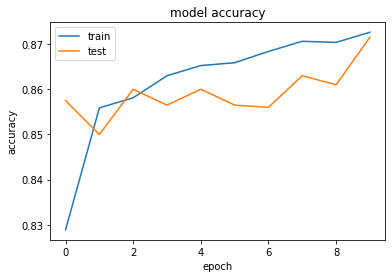

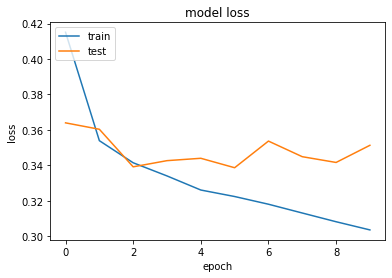

In [ ]:
import matplotlib.pyplot as plt
# list all data in history
print(history.history.keys())
# summarize history for accuracy
plt.plot(history.history['accuracy'])
plt.plot(history.history['val_accuracy'])
plt.title('model accuracy')
plt.ylabel('accuracy')
plt.xlabel('epoch')
plt.legend(['train', 'test'], loc='upper left')
plt.show()
# summarize history for loss
plt.plot(history.history['loss'])
plt.plot(history.history['val_loss'])
plt.title('model loss')
plt.ylabel('loss')
plt.xlabel('epoch')
plt.legend(['train', 'test'], loc='upper left')
plt.show()

In [ ]:
y_pred = model.predict(X_test)

63/63 [==============================] - 0s 2ms/step


In [ ]:
y_pred =  np.round(y_pred)

In [ ]:
y_pred

array([[0.],
       [0.],
       [0.],
       ...,
       [0.],
       [0.],
       [0.]], dtype=float32)

In [ ]:
y_test

9394    0
898     1
2398    0
5906    0
2343    0
       ..
1037    0
2899    0
9549    0
2740    0
6690    0
Name: Exited, Length: 2000, dtype: int64

In [ ]:
model.evaluate(X_test, y_test)

63/63 [==============================] - 0s 2ms/step - loss: 0.3513 - accuracy: 0.8715


[0.35130491852760315, 0.8715000152587891]

In [ ]:
from sklearn.metrics import confusion_matrix, accuracy_score

In [ ]:
confusion_matrix(y_test, y_pred)

array([[1550,   45],
       [ 212,  193]])

In [ ]:
accuracy_score(y_test, y_pred)

0.8715

In [ ]:
# save model and architecture to single file
model.save("model.h5")
print("Saved model to disk")

Saved model to disk


### Inference

In [ ]:
import numpy as np
import pandas as pd
from sklearn.model_selection import train_test_split
from sklearn.preprocessing import LabelEncoder
from sklearn.preprocessing import StandardScaler
dataset = pd.read_csv('Customer_Churn_Modelling.csv')
X = dataset.drop(labels=['CustomerId', 'Surname', 'RowNumber', 'Exited'], axis = 1)
y = dataset['Exited']

label1 = LabelEncoder()
X['Geography'] = label1.fit_transform(X['Geography'])
X = pd.get_dummies(X, drop_first=True, columns=['Geography'])
label = LabelEncoder()
X['Gender'] = label.fit_transform(X['Gender'])

X_train, X_test, y_train, y_test = train_test_split(X, y, test_size = 0.2, random_state = 0)
scaler = StandardScaler()
X_train = scaler.fit_transform(X_train)
X_test = scaler.transform(X_test)

In [ ]:
# load and evaluate a saved model

from keras.models import load_model

# load model
model = load_model('model.h5')
# summarize model.
model.summary()

# evaluate the model
score = model.evaluate(X_test, y_test, verbose=0)
print("%s: %.2f%%" % (model.metrics_names[1], score[1]*100))

Model: "sequential_1"
_________________________________________________________________
 Layer (type)                Output Shape              Param #   
 dense_3 (Dense)             (None, 64)                768       
                                                                 
 dense_4 (Dense)             (None, 128)               8320      
                                                                 
 dense_5 (Dense)             (None, 256)               33024     
                                                                 
 dense_6 (Dense)             (None, 1)                 257       
                                                                 
Total params: 42,369
Trainable params: 42,369
Non-trainable params: 0
_________________________________________________________________
accuracy: 87.15%


In [ ]:
model.predict(X_test)

63/63 [==============================] - 0s 2ms/step


array([[0.13431148],
       [0.2860089 ],
       [0.05217317],
       ...,
       [0.0296185 ],
       [0.09706033],
       [0.03774927]], dtype=float32)